**MNSIT** (Modified Nation Institute of Standards and Technology) is the most commonly used dataset for Digit recognition for Deep Learning because of its tens of thousands of handwritten images. it has total of 784 pixels each of 28 pixels in height and 28 pixels in width representing lightness or darkness of the picture


In [1]:
#installing the latest version of tensorflow
!pip install --upgrade tensorflow

In [3]:
# verify for the verion updated
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\akram\appdata\local\programs\python\python310\lib\site-packages
Requires: tensorflow-intel
Required-by: 


**Importing, Normalizing and Defining the layers** 

In [4]:
# Importing the required libraries
import tensorflow as tf


# Import MNIST data
mnist = tf.keras.datasets.mnist

# Creating training and testing datasets
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#Normalizing the datasets
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

# Defining a Sequential Model
model = tf.keras.models.Sequential()

#Defining layers of the model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
import numpy as np
np.max(x_train)

np.float32(1.0)

In [6]:
np.min(x_train)

np.float32(0.0)

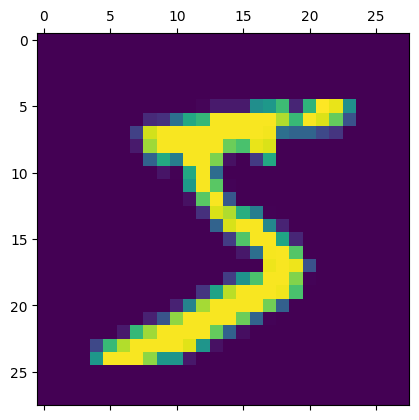

In [7]:
import matplotlib.pyplot as plt
plt.matshow(x_train[0])
plt.show()

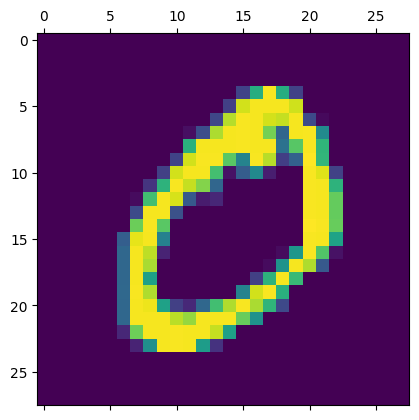

In [8]:
import matplotlib.pyplot as plt
plt.matshow(x_train[1])
plt.show()

In [9]:
y_train[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([5, 0])>

In [10]:
x_train[0].shape

TensorShape([28, 28])

In [11]:
x_train.shape,x_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

**Compiling the Model**

In [12]:
#Compiling the Model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [13]:
#Training the Model
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7281 - loss: 1.0294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9168 - loss: 0.2901
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9335 - loss: 0.2371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9442 - loss: 0.1989
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9577 - loss: 0.1512
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9618 - loss: 0.1359
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9650 - loss: 0.1237
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9682 - loss: 0.1146
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9707 - loss: 0.1032


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 256)                   │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 128)                   │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,148 (918.55 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Evaluating the Model**

In [15]:
#Evaluating the Model
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1380


[0.11816862970590591, 0.9646999835968018]

**Predicting using the Model**

In [16]:
#Making Prediction using the Model
import numpy as np
x_new = x_test[:10]
y_pred = model.predict(x_new)
print(y_pred)
#np.array(class_names)[y_red]
y_new = y_test[:10]
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[2.3684872e-05 1.7996201e-06 3.7966226e-04 1.2946550e-03 1.9712843e-07
  9.9212639e-06 9.3273966e-09 9.9801147e-01 7.5671946e-06 2.7090599e-04]
 [3.5278546e-04 3.1240427e-04 9.7143215e-01 2.7096838e-02 3.3066328e-08
  1.0608006e-04 6.2505231e-04 1.6681335e-08 7.4621632e-05 1.8095567e-09]
 [2.7800486e-05 9.8647052e-01 2.7477203e-03 1.9018651e-03 6.6677690e-04
  3.3402749e-04 7.5389602e-04 6.1077313e-03 8.4861642e-04 1.4111064e-04]
 [9.9934608e-01 1.3365515e-07 2.5152467e-04 2.6069247e-05 4.1223606e-07
  2.8885406e-05 7.3411349e-05 7.8929581e-05 1.3446380e-07 1.9437098e-04]
 [1.6450649e-04 9.8399710e-07 2.1415277e-04 4.0779694e-05 9.6403694e-01
  5.0125349e-05 2.3591070e-04 1.7222230e-03 1.9534232e-04 3.3339091e-02]
 [2.6406356e-06 9.7800314e-01 4.3409903e-04 9.1428548e-04 1.4495096e-04
  1.5638276e-05 1.2570154e-05 2.0176772e-02 2.2513932e-04 7.0717266e-05]
 [6.5251288e-06 1.2445358e-05 2.0594722e-05 1.5262479e-04 9.8280507e-01
  8.8780990e-04 4.74

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])>

**Ploting Accuracy and Loss** 

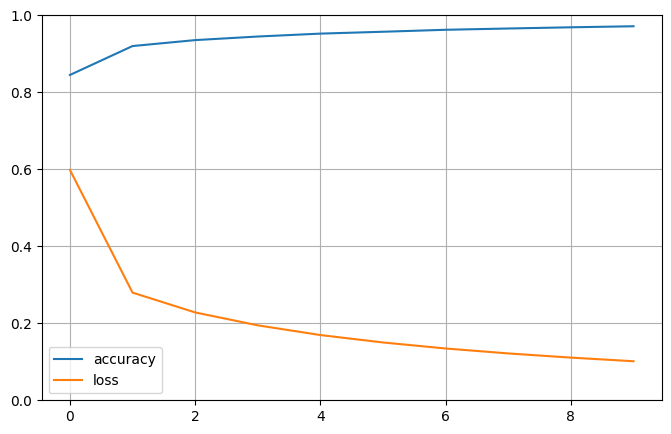

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()